In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

# Data Preprocessing

In [12]:
# Unpacking of the data in training & testing set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing the data
x_train = x_train/255
x_test = x_test/255

# One hot encoding
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)


# Building the Model

In [15]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5291 - accuracy: 0.4510 - val_loss: 1.4206 - val_accuracy: 0.5176
Epoch 2/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1656 - accuracy: 0.5911 - val_loss: 1.0882 - val_accuracy: 0.6244
Epoch 3/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0104 - accuracy: 0.6492 - val_loss: 1.0845 - val_accuracy: 0.6291
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9043 - accuracy: 0.6884 - val_loss: 0.9741 - val_accuracy: 0.6646
Epoch 5/15
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8227 - accuracy: 0.7188 - val_loss: 0.9930 - val_accuracy: 0.6740
Epoch 6/15
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7538 - accuracy: 0.7419 - val_loss: 0.9576 - val_accuracy: 0.6865
Epoch 7/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7001 - accuracy: 0.7629 - val_loss: 1.0453 -

In [18]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.529114,0.45104,1.420601,0.5176
1,1.165580,0.59114,1.088199,0.6244
2,1.010397,0.64916,1.084457,0.6291
3,0.904262,0.68836,0.974103,0.6646
4,0.822748,0.71878,0.992977,0.6740


losses columns: Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')
metrics: ['loss', 'accuracy']


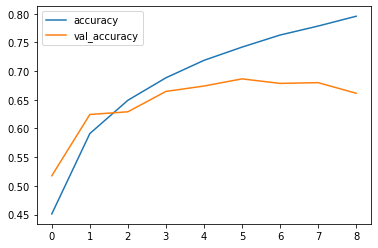

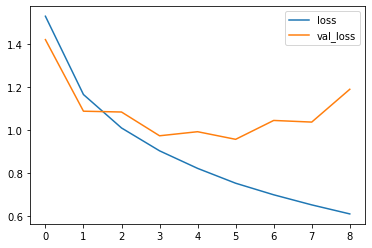

In [22]:
print('losses columns:',losses.columns)
print('metrics:',model.metrics_names)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [23]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1900149583816528, 0.6614000201225281]


In [24]:
predictions = model.predict_classes(x_test)

In [26]:
print('Classification report:')
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion matrix:')
print('\n')
print(confusion_matrix(y_test,predictions))

Classification report


              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1000
           1       0.73      0.83      0.78      1000
           2       0.51      0.58      0.54      1000
           3       0.50      0.48      0.49      1000
           4       0.52      0.75      0.62      1000
           5       0.69      0.43      0.53      1000
           6       0.74      0.74      0.74      1000
           7       0.78      0.68      0.72      1000
           8       0.82      0.68      0.75      1000
           9       0.81      0.67      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



Confusion matrix


[[782  30  46  22  32   4   9  10  44  21]
 [ 32 833  18   9   8   3  13   2  26  56]
 [ 77   8 580  44 157  38  54  23  10   9]
 [ 23  27 114 478 129  93  62  35  18  21]
 [ 17   1  92  28 747  1

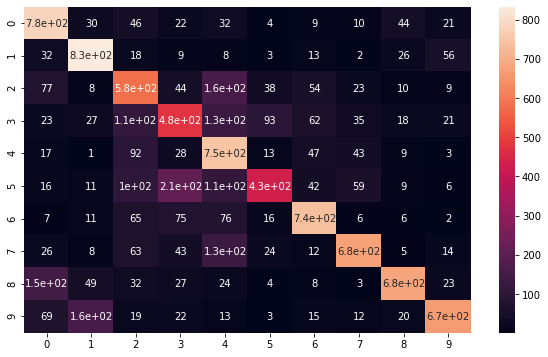

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

[5]


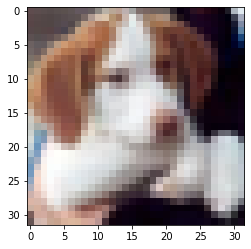

In [31]:
my_image = x_test[16]
print(y_test[16])
plt.imshow(my_image)

In [32]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))
# model is correctly predicting the value for the image of object dog 

array([5])

# The End